# Linear Regression



## Objectives

- Learn how use scatter plot to visualize relationship between two variables.
- Use matplotlib to draw a best-fit line.
- Using Scikit-Learn to generate a Linear Regression model and perform prediction.
- Evaluate the model by looking at the sum of squares error (SSE) value, R2 and adjusted R2 values.


## Introduction

The linear regression is one of the most common algorithms used to model the relationship among vaiables. It is routinely used to predict a numerical outcome from a related set of input predictors.

The simplest form of linear regression involves two variables where one variable is used to predict another. The assumption is that the two variables have a linear relationship. This can be expressed as an equation below, where we wish to predict y given a known value of x.

$$y = β_0+β_1x$$

In the equation, the values of $β_0$ and $β_1$ is fixed and modelling  refers to the processing of determining the values of $β_0$ and $β_1$.

Theorectically, for a linear relationship (straight line in a cartesian plane), we will only need 2 sets of (x, y) values (2 points) but in practise, due to noise and errors, we will usually need more. The usefulness of the equation depends on how well the values of $β_0$ and $β_1$ are chosen. That is of course possible only if we have sufficient and quality data from which to derive the best $β$ values. 

## Simple Linear Regression

In this practical, we will see how to use data to generate a linear regression models and then use the model for prediction. We will use a simple set of data for illustration purposes.

### Step 1

Obtain a copy of _SimpleLinearRegressionData.csv_ file and place it in the same folder as this notebook file.

We will first take a brief look at the data contained in file.

### Step 2

Create a new notebook in Jupyter and enter the following codes. To view some samples of the data, run the codes to display the first 5 rows of the data:

In [ ]:
#Enter your codes here to read in the SimpleLinearRegressionData.csv file.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SimpleLinearRegressionData.csv", index_col="Year")
print(df.head())

The codes uses the ```read_csv()``` function to read data stored in a CSV file. It uses the ```Year``` column as the index column. The data is stored in a Pandas ```DataFrame``` named ```df```.

The print statement will print out the first few rows of data. You should be able to see the following:

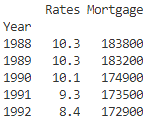

As can be seen, the data consists of the the columns *Year* (now set as the index of the ```DataFrame```), *Rates* and *Mortage*.
Usually, it is useful to visualize the relationship between two variables using a scatter plot.

### Step 3

Use a scatter plot as shown in the codes below:

In [ ]:
#Enter codes to visualize the data using a scatterplot

df.plot.scatter(title="Plot of Rates vs Mortgages", x="Rates", y="Mortgage", color="red")

### Step 4
Run the codes and you should see a scatter plot as shown below:

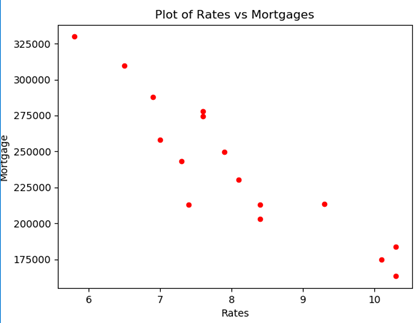

As can be seen from the figure, the two variables _Rates_ and _Mortgages_ are somewhat related to each other in a linear but inversely proportional manner. This implies that we should be able to get a good linear regression model.

### Best-Fit Line
Linear regression works by deriving a mathematical equation from the data. Due to inaccuracy and noise in the data, a perfect line is near impossible. Our aim is to plot a line that best fit the set of data. The best-fit line is a line that minimizes residual errors. Residual error is the difference between the observed and the predicted values.

### Step 5

To plot the best-fit line, insert the following codes:

In [ ]:
#Enter code to plot the best-fit line here

#Use Pandas to create a scatter plot, x-axis is Rates and y-axis is Mortage
#Use red colour for the points
ax = df.plot.scatter(x="Rates", y="Mortgage", color="red")

#polyfit = Fit the data using the least square polynomial
#Returns a list of the coefficients
coefficients = np.polyfit(df["Rates"], df["Mortgage"], 1)
#Use the coefficients to create a polynomial
p = np.poly1d(coefficients)
#Evaluate the polynomial on the rates data
df["best_fit"] = p(df.loc[:, "Rates"])
#Create another dataframe with rates as the index
# and Mortage vs the best_fit points
df2 = df.set_index("Rates", inplace=False)
#Plot
df2.best_fit.plot(ax=ax)

The Numpy’s ```polyfit()``` function (https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html) generates the coefficients of the best-fit line in the form of a vector. The coefficients are then passed into the ```poly1d()``` function to create the best-fit line. We can then plot the line using the rates column (```df.loc[:, "Rates"]```). The results are then plotted.

Run the codes, you should see the best fit line drawn as shown in the figure below:

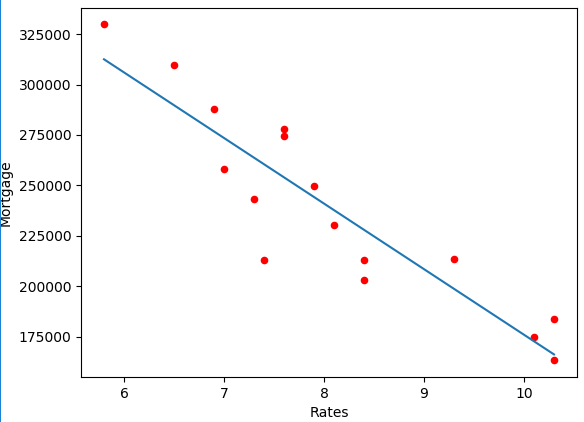

### Simple Linear Regression Modelling

We will now generate a scikit-learn linear regression model and subsequently use the model to predict a value. The Linear Regression algorithm is found under the ```sklearn.linear_model``` module.

### Step 6

Create a LinearRegression model and train the model using data from the _Rates_ and _Mortage_ columns as follows:

Note
```df["Rates"].values``` is one data point of many features while ```df["Rates"].values.reshape(-1,1)``` is many data points, each with only one feature.

In [ ]:
#Enter your codes here

from sklearn.linear_model import LinearRegression
#Get the rate column and reshape it to a series
rates = df["Rates"].values.reshape(-1, 1)
#Get the mortgage column and reshape it to a series
mortgage = df["Mortgage"].values.reshape(-1, 1)
#Create LinearRegression
model = LinearRegression()
#train the model using the fit() function
model.fit(rates, mortgage)

We can also take a look at the equation generated by the ```fit()``` function. The coefficient ($β_1$) and intercept ($β_0$) can be retrieved using ```model.coef_``` and ```model.intercept_```.

### Step 7

Print out the equation of the regression model as follows:

In [ ]:
#Print our the model coefficients and intercept there

print("Equation y={0:.2f}*x + {1:.2f}".format(model.coef_[0][0], model.intercept_[0]))

You should see the following results:

```
Equation y=-32518.17*x + 501105.72
```

This is the mathematical model that can be used for subsequent prediction using the ```predict()``` function.
To see how prediction works, we will input a value of 8.0 for the rates and see how well the model works. Based on the best-fit line we plotted earlier, we can guess that the predicted valued will be between 225k and 250k.

### Step 8

Key in the following codes and execute them to see the results for predicting mortage at a rate of 8%

In [ ]:
#Enter codes to perform prediction using your Regression model

print("Equation y={0:.2f}*x + {1:.2f}".format(model.coef_[0][0], model.intercept_[0]))

You should see the following output:

```
Predicted mortgage: 240960.40
```

As can be seen from the best-fit line, the value is approximately 240k which is inline with the prediction. You can also verify the value by substituting the value in the equation generated previously.

### Evaluating the Model

Very often, we will need to know how well our model works, especially when we need to compare different models and pick the best among them.

### Sum of Squares Error (SSE)

The Sum of Squares Error (SSE) value provides an indication of the performance of a model. Recall that we generate a model by minimizing the SSE of the training data, in other words, the lower the value of SSE, the small the prediction error.

### Step 9

To generate the SSE value of our model, we can do the following:

In [ ]:
#Enter codes to calculate the SSE value of your model
print("Equation y={0:.2f}*x + {1:.2f}".format(model.coef_[0][0], model.intercept_[0]))

The line of codes use the model object to perform predictions and calculate the square of the difference between the actual and predicted values. The sum is then calculated and printed.

### Step 10

Run the codes and you should see the following results:

```
SSE: 386904189.98
```

In situation that more and better-quality data are available, you can re-generate the model and obtain better (smaller) SSE value.

### Coefficient of Determination ($R^2$) Value

$R^2$ value is an important and commonly used value to compare the predictive power of the models. ```Scikit-Learn``` package provides a ```r2_score()``` function under ```sklearn.metrics``` that can helps to calculate the $R^2$ value.

### Step 11

Add the ```Import``` statement to import the ```r2_score()``` function from ```sklearn.metrics``` module as follows:


In [ ]:
#Import the r2_score function

from sklearn.metrics import r2_score

### Step 12

Use the following codes to generate the $R^2$ value of our model:



In [ ]:
#Enter your codes to print out the R2 score
#Calculates the R sequared value
r2 = r2_score(mortgage, model.predict(rates))
#Print out the R sequared value
print("R Squared: {0:.2f}".format(r2))

The ```r2_score()``` function accepts two parameters - an array of true values and the predicted values. It will calculate the $R^2$ value for us.

### Step 13

Run the codes and you should see the following results:

```R Squared: 0.82```

Values of $R^2$ ranges from 0 (worst) to 1 (best). A score of 0.82 is very good performance for our model. This is not unexpected as the scatter plot already shown us that the variables are linearly related.

## Exercise: Multiple Linear Regression

In most real-world problems, we will need to deal with more than one input variables. In such cases, we can use a more generalized equation:

$$y=β_0+β_1 x_1+β_2 x_2+⋯+β_kx_k$$
Where $k$ is the number of input variables/predictors.

Let us now extend the use of scikit-learn regression model from single to three input variables. We will be using a dataset containing insurance claims for a single medical treatment performed in a hospital. In addition to the claim amount (CLAIM), the data file also contains patient age (AGE), length of hospital stay (LOS) and a severity of illness category (ASG). The ASG field is based on several health measures and higher scores indicate greater severity of the illness. 

In this exercise, you are required to build a regression model that predicts the total claim amount for a patient based on his/her length of stay, severity of illness and patient age.
Use the codes you have done in the previous section and the following task list as a guide:

[The full answer is provided below]
1. Obtain a copy of InsuranceClaim.csv file and place it in the same directory as your source codes. 
2. Read in the values using numpy or pandas.

If you use Numpy, you can use the ```genfromtxt()``` function to read in values. Also, remember to remove the heading.

3.	Create a LinearRegression model.
4.	Train the model using the fit() function.
5.	Use the model to predict and print out a predicted claim value.
6.	Print out the regression equation.
7.	Print out R2 value.

In [ ]:
#Enter your answers here
import numpy as np
from sklearn.linear_model import LinearRegression

#Read in the CSV file using Numpy, indicating values are separated using , character
data = np.genfromtxt("InsuranceClaim.csv", delimiter=",")
data = data[1:, :] #Remove heading in first row

#Initialize Linear Regression model
model = LinearRegression()
#Train the model with our input variables and labelled data
model.fit(data[:, :3], data[:, 3])

#A sample of testing data
test_data = np.array([
    [0, 26, 2]
])

#Results of using the model to predict
print("Predicted claim is: {0:.2f} ".format(model.predict(test_data)[0]))
coeff = model.coef_
print("Equation: {0:.2f} * ASG + {1:.2f} * AGE + {2:.2f} * LOS + {3:.2f}".format(coeff[0], coeff[1], coeff[2], model.intercept_))
print("R Squared: {0:.2f}".format(r2_score(data[:, 3], model.predict(data[:, :3]))))

### Step 13 

#### Adjusted R2
In some cases, $R^2$ does not provide the best evaluation measurement of the performance of our model. This is because $R^2$ measurement does not penalize the inclusion of useless input variables. In other words, the more input variables used in the model, the higher the score. This is not desireable as including input variables that does not contributes significantly to quality of the prediction adds costs for data collection as well as processing time. 
It is thus useful to use Adjusted $R^2$ defined as:

$$Adjusted\, R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

Where $n$ = number of data samples in the data and $p$ = number of input variables
As can be seen from the equation, as p increases, adjusted $R^2$ value decreases (the larger the value of $R^2$, the better the model).
The following codes calculates the adjusted $R^2$ value from the $R^2$ we obtained previously from the ```r2_score()``` function.

#### Numpy


In [ ]:
#Numpy
r2 = r2_score(data[:, 3], model.predict(data[:, :3]))
number_variables = data.shape[1] -1 #-1 because data set includes the labelled data
adjusted_r2 = 1 - ((1-r2) * (data.shape[0]-1)) / (data.shape[0]-number_variables-1)
print("Adjusted R Squared: {0:.2f}".format(adjusted_r2))

#Pandas
r2 = r2_score(df.iloc[:, 3], model.predict(df.iloc[:, :3]))
number_variables = df.shape[1]-1
adjusted_r2 = 1 - ((1-r2) * (df.shape[0]-1)) / (df.shape[0]-df.shape[1]-1)
print("Adjusted R Squared: {0:.2f}".format(adjusted_r2))

If you run the codes, you should see that $R^2$ value is 0.32 while adjusted $R^2$ value is 0.31, showing that adjusted $R^2$ value is less as it takes into account the number of input variables used. Note also that $R^2$ and adjusted $R^2$ values will be very similar if the number of data samples is much larger then the number of input variables.

## Conclusions

In the practical, we looked at how to use create a polymomial that fits a set of data using the least square method. The polynomial is then displayed as the best-fit line.

We also see how to use Scikit-Learn to generate Linear and Regression models (both for simple and mulitple variables).  We have also seen how to evaluate the models using the SSE, R squared and adjusted R squared values.